<a href="https://colab.research.google.com/github/DevaHarshiniModepalli/DevaHarshini425/blob/main/OSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps to proceed>>
Mention abt prblm stmnt

talk abt colmns

install modules and reqd librs

load dataset

understand your data

EDA

    uni
    bi
    multi

chck null vals or miss val

    treat nulls with mean median or mode
    drop nulls if less than 5% -10%

chck duplicates

    drop duplicates
treating the outliers

    check outliers
    remove outliers
    make box plot before and after outliers
Feature Engineering

    a)
    extract the features
    create features
    select features
    b)checking multicoliniarity
    heat map
    vif technique
    One hot or label
    d)scaling
    Standard
    MinMax
X-y feature split

Train_test split


# Problem Statement
Apply the cluster analysis on the above dataset to understand which customers are gives **revenue** and **non-revenue**

# Data Description
The dataset consists of feature vectors belonging to **12,330** sessions. The dataset was formed so that each session would belong to a different user in a **1-year period** to avoid any tendency to a specific campaign, special day, user profile, or period

# Columns information
 The dataset consists of 10 numerical and 8 categorical attributes.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.

The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.

The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.

The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.

The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.

For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.


# Install modules and libraries required

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# load dataset

In [ ]:
osi=pd.read_csv("/content/drive/MyDrive/online_shoppers_intention.csv")
osi.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
97995,1,2093.900453,20,438.993425,676,63653.493703,0.049749,0.068814,26.230931,0.683104,Jul,2,1,3,14,Returning_Visitor,True
97996,27,3392.587490,22,910.620855,75,17831.242600,0.105052,0.029734,83.063416,0.619082,Jun,2,11,7,9,Returning_Visitor,False
97997,6,236.829385,20,2213.647664,118,34341.761329,0.063482,0.015144,193.672320,0.496868,Dec,5,8,5,6,Other,False
97998,12,2212.771577,16,2252.237564,483,21171.811242,0.094878,0.085289,352.811203,0.729631,May,6,4,3,9,Other,True
97999,5,3336.834751,22,887.764936,379,32484.619848,0.106573,0.044984,261.886125,0.874494,Mar,2,9,3,10,Other,False


In [ ]:
osi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           98000 non-null  int64  
 1   Administrative_Duration  98000 non-null  float64
 2   Informational            98000 non-null  int64  
 3   Informational_Duration   98000 non-null  float64
 4   ProductRelated           98000 non-null  int64  
 5   ProductRelated_Duration  98000 non-null  float64
 6   BounceRates              98000 non-null  float64
 7   ExitRates                98000 non-null  float64
 8   PageValues               98000 non-null  float64
 9   SpecialDay               98000 non-null  float64
 10  Month                    98000 non-null  object 
 11  OperatingSystems         98000 non-null  int64  
 12  Browser                  98000 non-null  int64  
 13  Region                   98000 non-null  int64  
 14  TrafficType           

# EDA

In [ ]:
osi.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,13.470429,1706.117887,11.965092,1271.142517,352.837827,31985.100863,0.099918,0.099886,181.294884,0.499371,4.508939,6.986122,4.994265,10.507724
std,8.069361,980.180099,7.196502,735.649668,204.026481,18449.585420,0.057650,0.057724,104.557959,0.288945,2.291745,3.740453,2.578596,5.771585
min,0.000000,0.019749,0.000000,0.028320,0.000000,0.833681,0.000001,0.000001,0.002676,0.000005,1.000000,1.000000,1.000000,1.000000
25%,6.000000,856.812806,6.000000,633.801242,177.000000,15985.650481,0.050180,0.049938,90.309731,0.247946,3.000000,4.000000,3.000000,6.000000
50%,13.000000,1710.024474,12.000000,1265.264967,353.000000,32045.630448,0.099875,0.099922,181.311823,0.500222,5.000000,7.000000,5.000000,11.000000
75%,20.000000,2555.643540,18.000000,1910.210830,530.000000,47910.978300,0.149841,0.149710,271.885254,0.749894,7.000000,10.000000,7.000000,16.000000
max,27.000000,3398.706448,24.000000,2549.347690,705.000000,63972.958473,0.200000,0.199999,361.755872,0.999966,8.000000,13.000000,9.000000,20.000000


In [ ]:
osi.duplicated().sum()

0

In [ ]:
osi.isna().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


# Univariate


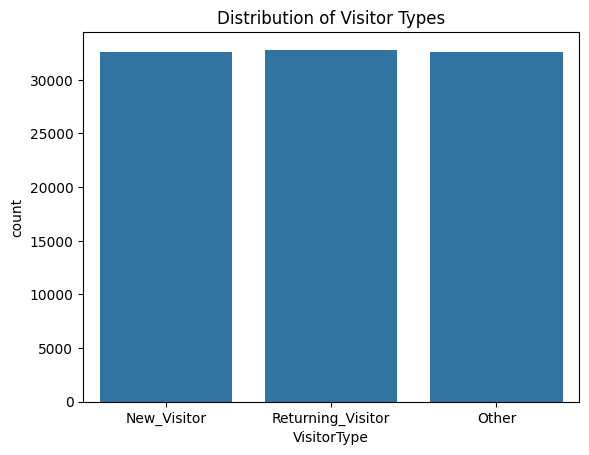

In [ ]:
sns.countplot(x='VisitorType', data=osi)
plt.title('Distribution of Visitor Types')
plt.show()

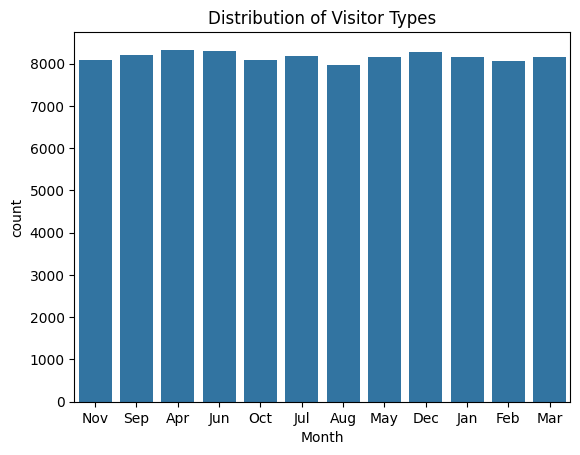

In [ ]:
sns.countplot(x='Month', data=osi)
plt.title('Distribution of Visitor Types')
plt.show()

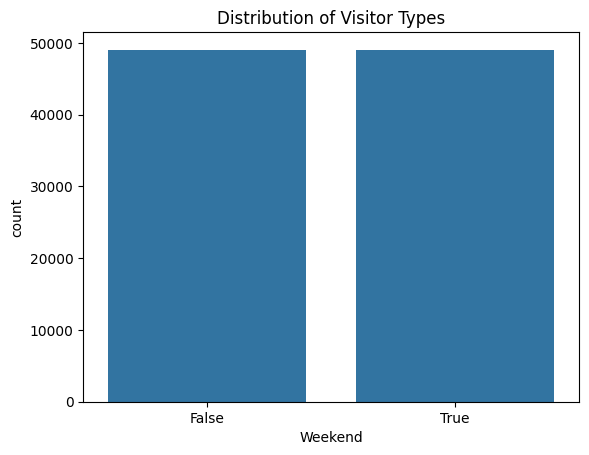

In [ ]:
sns.countplot(x='Weekend', data=osi)
plt.title('Distribution of Visitor Types')
plt.show()

# Bivariate

In [ ]:
osi['Administrative_Total'] = osi['Administrative'] * osi['Administrative_Duration']
osi['Informational_Total'] = osi['Informational'] * osi['Informational_Duration']
osi['ProductRelated_Total'] = osi['ProductRelated'] * osi['ProductRelated_Duration']

# Calculate total time for each page type
administrative_total = osi['Administrative_Total'].sum()
informational_total = osi['Informational_Total'].sum()
productrelated_total = osi['ProductRelated_Total'].sum()

In [ ]:
# Data for pie plot
page_types = ['Administrative', 'Informational', 'ProductRelated']
time_spent = [administrative_total, informational_total, productrelated_total]

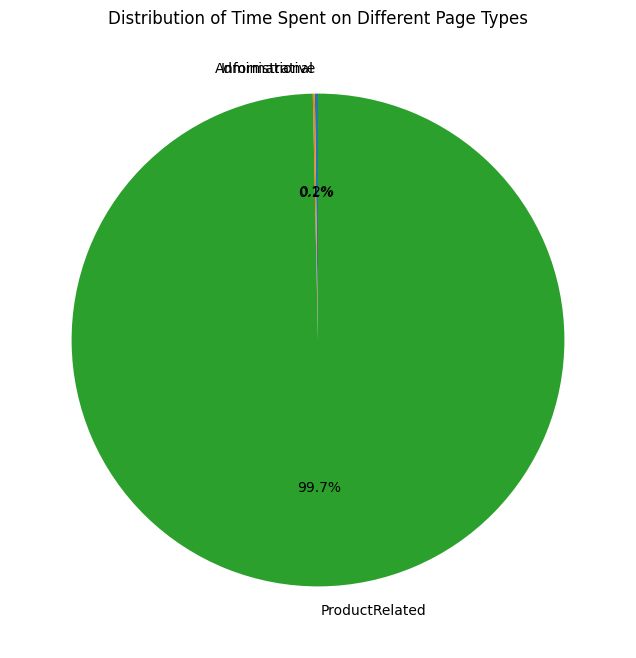

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(time_spent, labels=page_types, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Time Spent on Different Page Types')
plt.show()

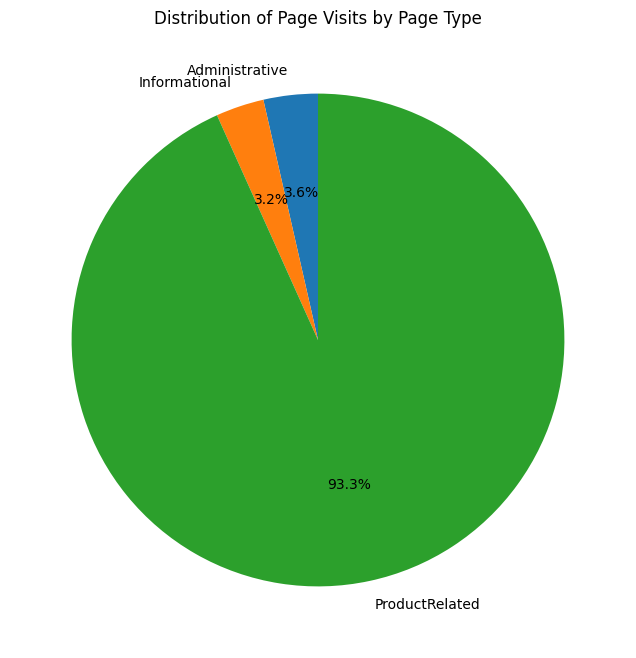

In [ ]:
import matplotlib.pyplot as plt

# Data for pie plot
page_types = ['Administrative', 'Informational', 'ProductRelated']
page_visits = [osi['Administrative'].sum(),
               osi['Informational'].sum(),
               osi['ProductRelated'].sum()]

# Create pie plot
plt.figure(figsize=(8, 8))
plt.pie(page_visits, labels=page_types, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Page Visits by Page Type')
plt.show()

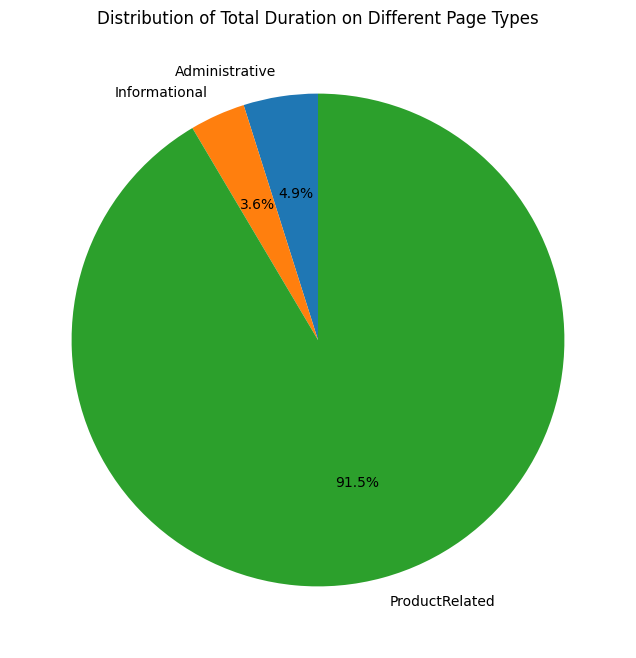

In [ ]:
import matplotlib.pyplot as plt

# Data for pie plot
page_types = ['Administrative', 'Informational', 'ProductRelated']
durations = [osi['Administrative_Duration'].sum(),
             osi['Informational_Duration'].sum(),
             osi['ProductRelated_Duration'].sum()]

# Create pie plot
plt.figure(figsize=(8, 8))
plt.pie(durations, labels=page_types, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Total Duration on Different Page Types')
plt.show()

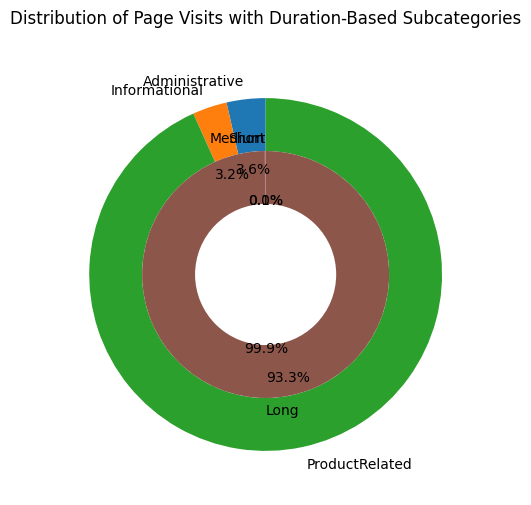

In [ ]:
import matplotlib.pyplot as plt

# Data for outer pie (page types)
page_types = ['Administrative', 'Informational', 'ProductRelated']
page_visits = [osi['Administrative'].sum(),
               osi['Informational'].sum(),
               osi['ProductRelated'].sum()]

# Data for inner pie (duration-based subcategories)
short_visits = osi[(osi['ProductRelated'] > 0) & (osi['ProductRelated_Duration'] < 30)]['ProductRelated'].sum()
medium_visits = osi[(osi['ProductRelated'] > 0) & (osi['ProductRelated_Duration'] >= 30) & (osi['ProductRelated_Duration'] < 60)]['ProductRelated'].sum()
long_visits = osi[(osi['ProductRelated'] > 0) & (osi['ProductRelated_Duration'] >= 60)]['ProductRelated'].sum()

duration_subcategories = [short_visits, medium_visits, long_visits]
subcategory_labels = ['Short', 'Medium', 'Long']

# Create nested pie chart
fig, ax = plt.subplots()

# Outer pie
ax.pie(page_visits, labels=page_types, autopct='%1.1f%%', startangle=90, radius=1, wedgeprops=dict(width=0.3),textprops={'fontsize': 10, 'color': 'black'})

# Inner pie
ax.pie(duration_subcategories, labels=subcategory_labels, autopct='%1.1f%%', startangle=90, radius=0.7, wedgeprops=dict(width=0.3), textprops={'fontsize': 10, 'color': 'black'})


# Adjust layout to prevent title overlap
plt.tight_layout()
plt.subplots_adjust(top=0.95)


# Customize label properties (optional)


plt.title('Distribution of Page Visits with Duration-Based Subcategories', y=1.05)
plt.show()

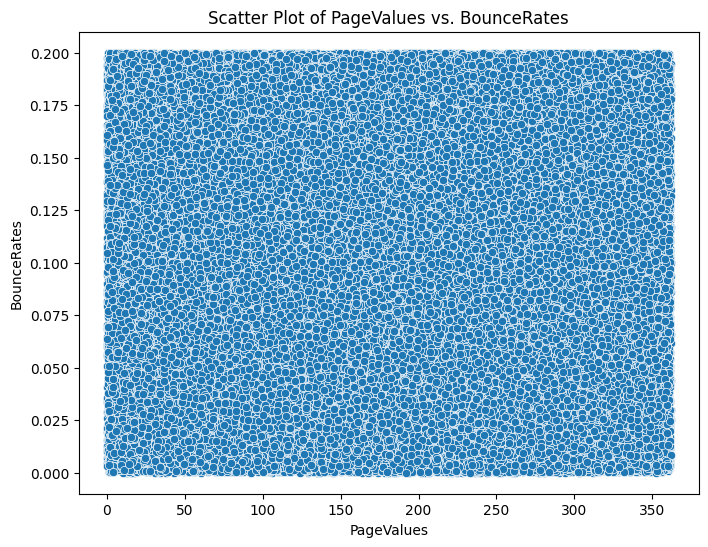

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PageValues', y='BounceRates', data=osi)
plt.title('Scatter Plot of PageValues vs. BounceRates')
plt.show()

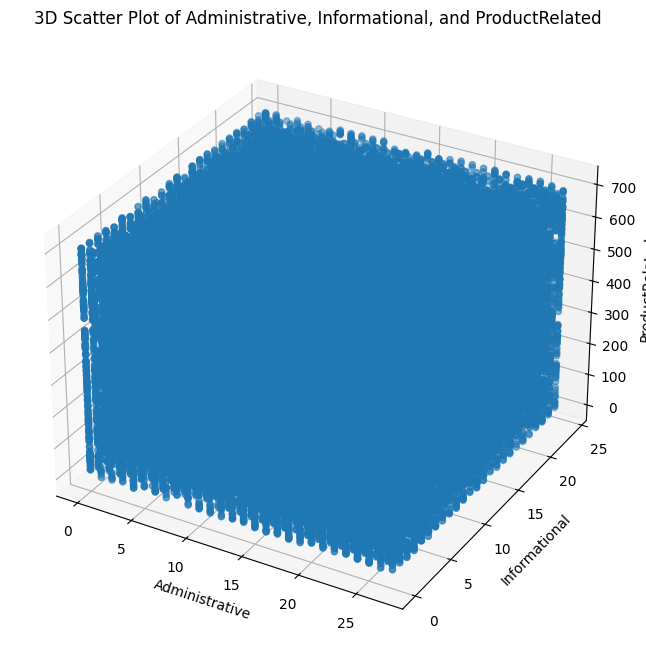

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(osi['Administrative'], osi['Informational'], osi['ProductRelated'])
ax.set_xlabel('Administrative')
ax.set_ylabel('Informational')
ax.set_zlabel('ProductRelated')
plt.title('3D Scatter Plot of Administrative, Informational, and ProductRelated')
plt.show()

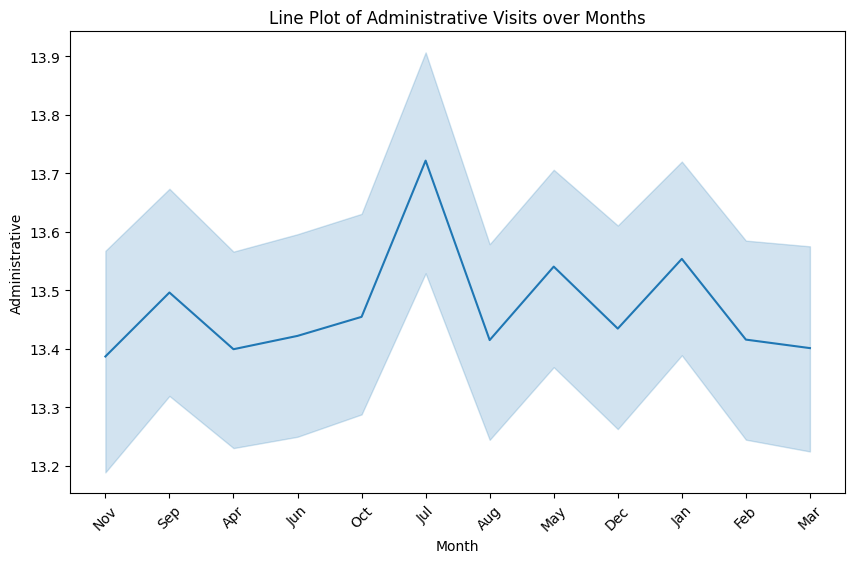

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Administrative', data=osi)
plt.title('Line Plot of Administrative Visits over Months')
plt.xticks(rotation=45)
plt.show()

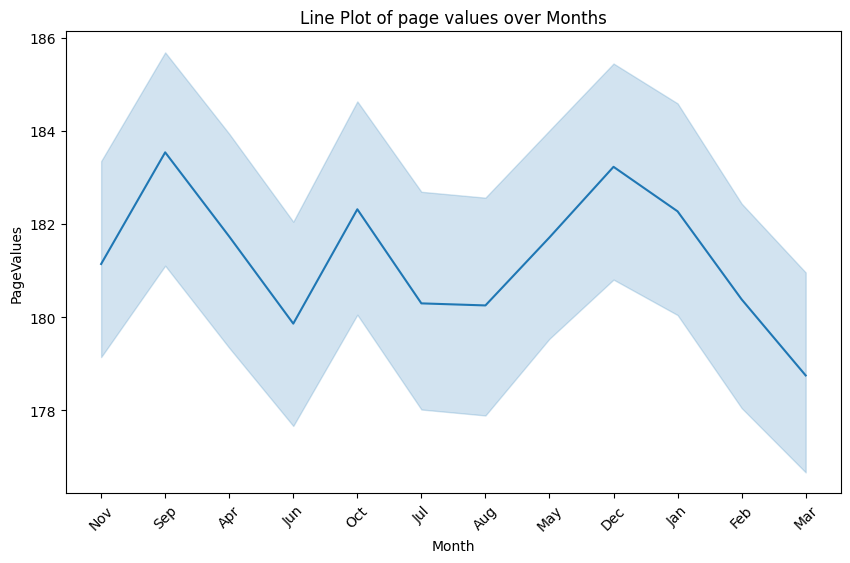

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='PageValues', data=osi)
plt.title('Line Plot of page values over Months')
plt.xticks(rotation=45)
plt.show()

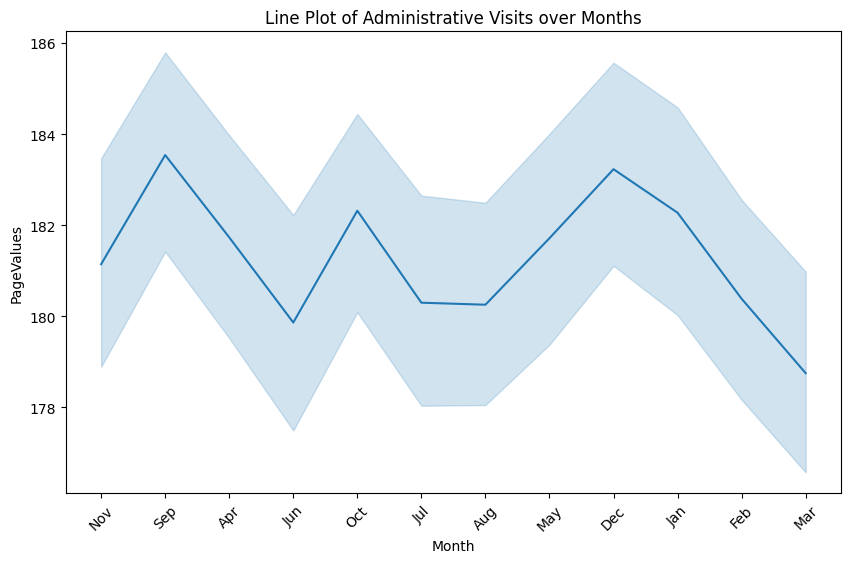

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='PageValues', data=osi)
plt.title('Line Plot of Administrative Visits over Months')
plt.xticks(rotation=45)
plt.show()

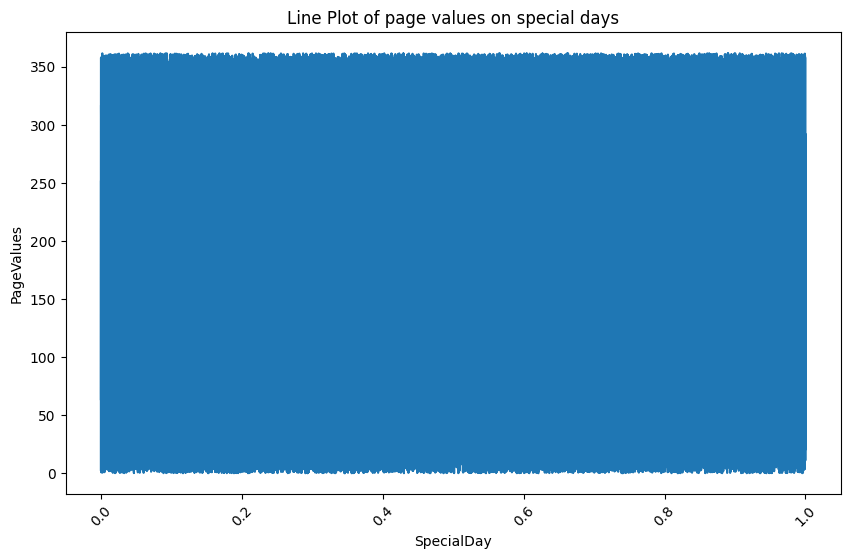

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='SpecialDay', y='PageValues', data=osi)
plt.title('Line Plot of page values on special days')
plt.xticks(rotation=45)
plt.show()

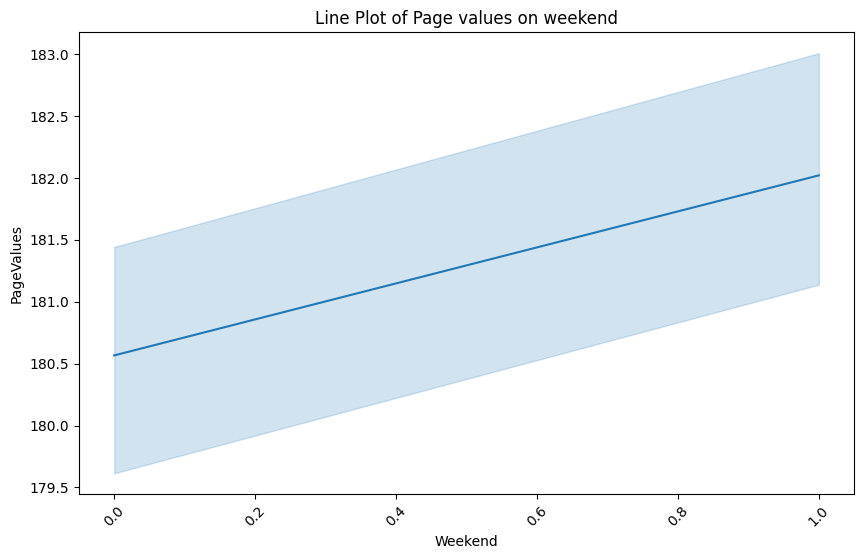

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Weekend', y='PageValues', data=osi)
plt.title('Line Plot of Page values on weekend')
plt.xticks(rotation=45)
plt.show()

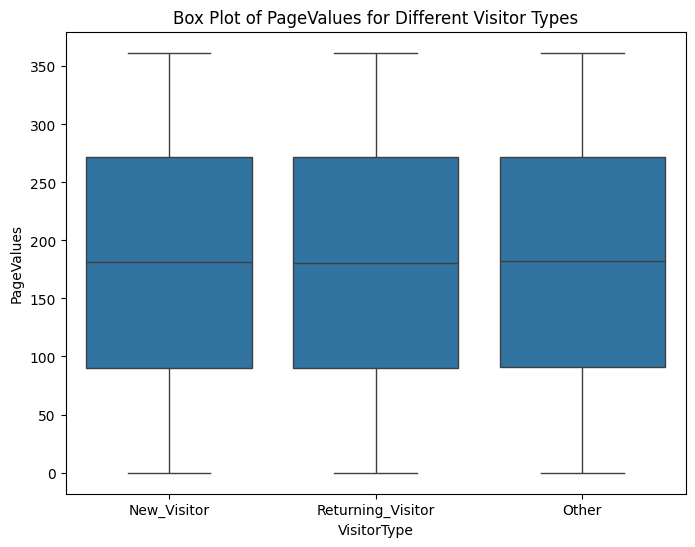

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='VisitorType', y='PageValues', data=osi)
plt.title('Box Plot of PageValues for Different Visitor Types')
plt.show()

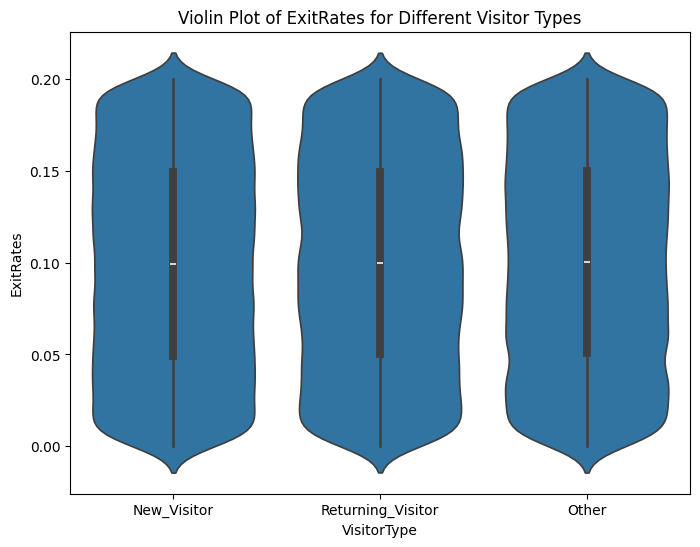

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='VisitorType', y='ExitRates', data=osi)
plt.title('Violin Plot of ExitRates for Different Visitor Types')
plt.show()

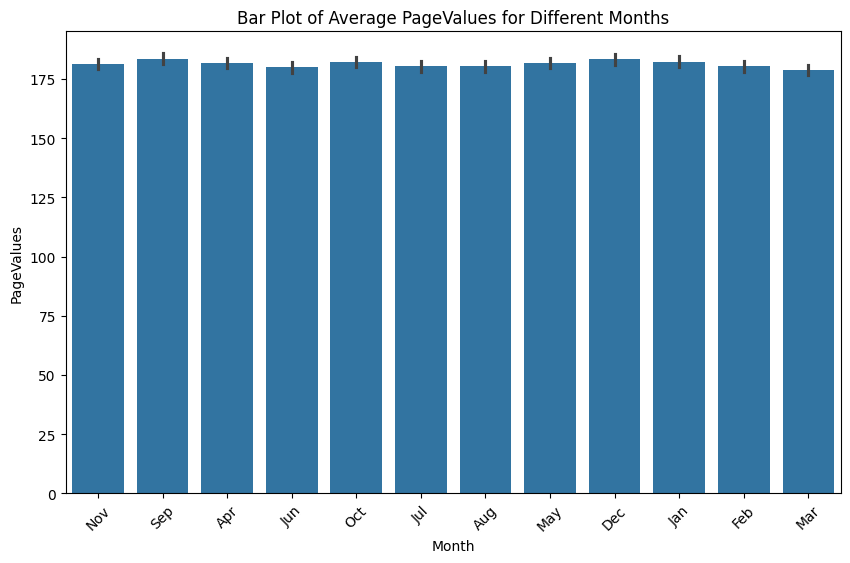

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='PageValues', data=osi)
plt.title('Bar Plot of Average PageValues for Different Months')
plt.xticks(rotation=45)
plt.show()

# Multivariate

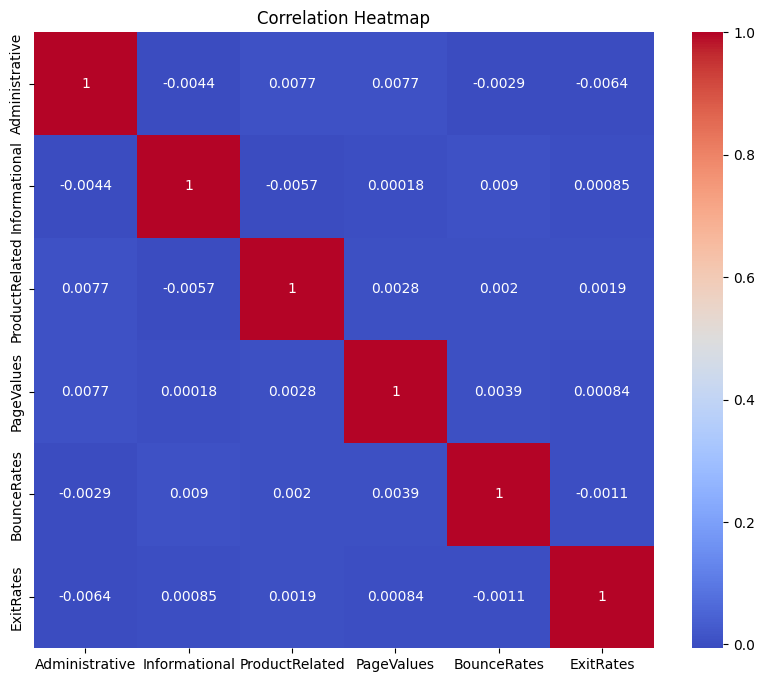

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(osi[['Administrative', 'Informational', 'ProductRelated', 'PageValues', 'BounceRates', 'ExitRates']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

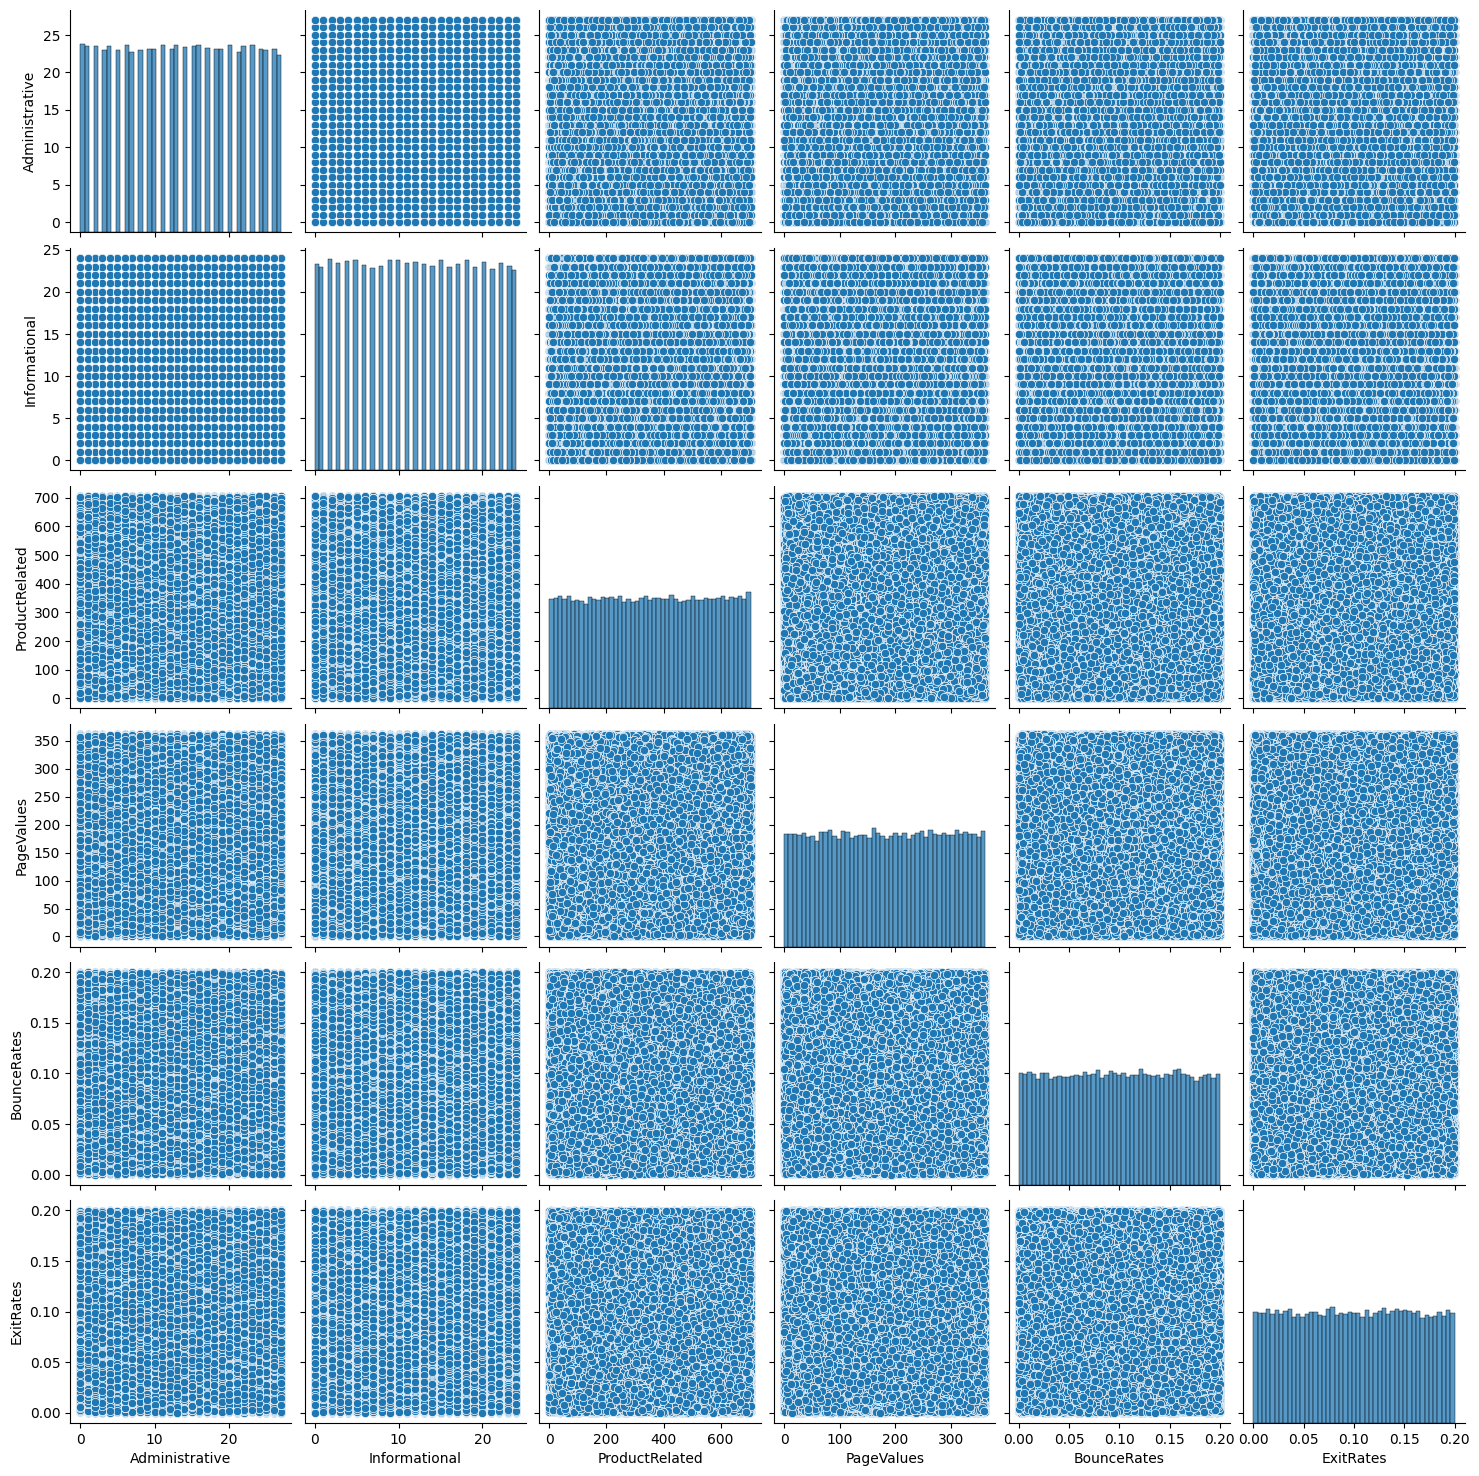

In [ ]:
sns.pairplot(osi[['Administrative', 'Informational', 'ProductRelated', 'PageValues', 'BounceRates', 'ExitRates']])
plt.show()